<a href="https://colab.research.google.com/github/snu-digital-finance/ProductionML/blob/main/Library_Simplify_ProductionML_1027_%EB%8F%8C%EC%95%84%EA%B0%91%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library (close)

## Visualization (Plotting)

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from itertools import count

FIG_NO = count(1)

def draw_triptych(title_prefix, Kv, Lv, y_true, y_pred,
                  vmin=0.0, vmax=1.0, fig_no=None, caption=None):
    if fig_no is None:
        fig_no = next(FIG_NO)

    mse = (y_true - y_pred) ** 2

    fig = plt.figure(figsize=(18, 5))
    gs = GridSpec(
        nrows=1, ncols=9, figure=fig,
        width_ratios=[1, 0.04, 0.2, 1, 0.04, 0.2, 1, 0.04, 0.2]
    )

    # (1) True
    ax1 = fig.add_subplot(gs[0, 0], projection='3d')
    sc1 = ax1.scatter(Kv, Lv, y_true, c=y_true, alpha=0.8, s=14)
    ax1.set_title(f"(a) {title_prefix} True Y")
    ax1.set_xlabel("K"); ax1.set_ylabel("L"); ax1.set_zlabel("Y")
    ax1.set_xlim(0, 1); ax1.set_ylim(0, 1)
    cax1 = fig.add_subplot(gs[0, 1])
    cb1 = fig.colorbar(sc1, cax=cax1)
    cb1.set_label("Y", fontsize=13)
    cb1.ax.tick_params(labelsize=11)

    # (2) Predicted
    ax2 = fig.add_subplot(gs[0, 3], projection='3d')
    sc2 = ax2.scatter(Kv, Lv, y_pred, c=y_pred, alpha=0.8, s=14)
    ax2.set_title(f"(b) {title_prefix} Predicted Ŷ")
    ax2.set_xlabel("K"); ax2.set_ylabel("L"); ax2.set_zlabel("Ŷ")
    ax2.set_xlim(0, 1); ax2.set_ylim(0, 1)
    cax2 = fig.add_subplot(gs[0, 4])
    cb2 = fig.colorbar(sc2, cax=cax2)
    cb2.set_label("Ŷ", fontsize=13)
    cb2.ax.tick_params(labelsize=11)

    # (3) MSE
    ax3 = fig.add_subplot(gs[0, 6], projection='3d')
    sc3 = ax3.scatter(Kv, Lv, y_true, c=mse, cmap="Reds",
                      alpha=0.8, s=14, vmin=vmin, vmax=vmax)
    ax3.set_title(f"(c) {title_prefix} MSE ( (Y−Ŷ)^2 )")
    ax3.set_xlabel("K"); ax3.set_ylabel("L"); ax3.set_zlabel("Y (at truth)")
    ax3.set_xlim(0, 1); ax3.set_ylim(0, 1)
    cax3 = fig.add_subplot(gs[0, 7])
    cb3 = fig.colorbar(sc3, cax=cax3)
    cb3.set_label("MSE", fontsize=13)
    cb3.ax.tick_params(labelsize=11)

    cap = f"Figure {fig_no}. {caption}" if caption else f"Figure {fig_no}. {title_prefix}"
    fig.suptitle(cap, fontsize=20, y=0.97)

    fig.subplots_adjust(
        left=0.05, right=0.95, top=0.9, bottom=0.05, wspace=0.6
    )

    plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# === 1. Data ===
np.random.seed(42)
tf.random.set_seed(42)

n = 1000
noise_scale = 0.05

# K-intensive: K~U(0,1), L=0
K = np.random.rand(n, 1)
L0 = np.zeros((n, 1))
X_K = np.hstack([K, L0])

# L-intensive: K=0, L~U(0,1)
K0 = np.zeros((n, 1))
L = np.random.rand(n, 1)
X_L = np.hstack([K0, L])

# Targets with noise
y1 = K**3 + np.random.normal(0, noise_scale, size=(n, 1))      # K³ + noise
y2 = -K**3 + np.random.normal(0, noise_scale, size=(n, 1))     # −K³ + noise
y3 = L**3 + np.random.normal(0, noise_scale, size=(n, 1))      # L³ + noise
y4 = -L**3 + np.random.normal(0, noise_scale, size=(n, 1))


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Lambda

# Original Model - 5 layer trained on y1
def build_model():
    model = Sequential([
        tf.keras.Input(shape=(2,)),
        Lambda(tf.nn.relu, name="input_relu"),
        Dense(8, activation="relu"),
        Dense(8, activation="relu"),
        Dense(8, activation="relu"),
        Dense(1, activation="linear")
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

model = build_model()
model.fit(X_K, y1, epochs=100, batch_size=32, verbose=0)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_relu (Lambda)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533 (2.09 KB)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 356 (1.39 KB)

In [4]:
# TL Model 1 - Train on y1 data -> Transfer Learning to y2 data (last 2 layers)
model_tf_y2 = Sequential()
for i in range(3):
    layer = model.layers[i]
    layer.trainable = False
    model_tf_y2.add(layer)

model_tf_y2.add(Dense(8, activation="relu"))
model_tf_y2.add(Dense(1))
model_tf_y2.compile(optimizer="adam", loss="mse")

model_tf_y2.fit(X_K, y2, verbose=0, epochs=100, batch_size=32)

# TL Model 2 - Train on y1 data -> Transfer Learning to y3 data (last 2 layers)
model_tf_y3 = Sequential()
for i in range(3):
    layer = model.layers[i]
    layer.trainable = False
    model_tf_y3.add(layer)

model_tf_y3.add(Dense(8, activation="relu"))
model_tf_y3.add(Dense(1))
model_tf_y3.compile(optimizer="adam", loss="mse")

model_tf_y3.fit(X_L, y3, verbose=0, epochs=100, batch_size=32)

### Train on y1(K-intensive) 10 times

See what happens if the NN model encounters data on production functions with untrained parameters.

(Only trained on K -> predict data on L)

In [5]:
# ---------- Train 10 independent models on y1, evaluate on L ----------
n_trials = 10
L_preds = []

for t in range(n_trials):
    print(f"[Trial {t+1}/{n_trials}] training on y1 ...")
    m = build_model()
    m.fit(X_K, y1, epochs=50, batch_size=32, verbose=0)  # train ONLY on y1
    L_pred_t = m.predict(X_L, verbose=0).ravel()
    L_preds.append(L_pred_t)

L_preds = np.vstack(L_preds)                             # shape (10, N)
L_true_1d = y3.ravel()
K0_1d = K0.ravel()
L_1d  = L.ravel()

mse_all = (L_preds - L_true_1d)**2                      # (10, N)
vmin, vmax = 0.0, 1.0

[Trial 1/10] training on y1 ...
[Trial 2/10] training on y1 ...
[Trial 3/10] training on y1 ...
[Trial 4/10] training on y1 ...
[Trial 5/10] training on y1 ...
[Trial 6/10] training on y1 ...
[Trial 7/10] training on y1 ...
[Trial 8/10] training on y1 ...
[Trial 9/10] training on y1 ...
[Trial 10/10] training on y1 ...


### OLS vs. ReLU Functions

# Run

### Draw Mean of y1(K-intensive) 10 times -> evaluate on L data

Random Predictions on Parameters that the model wasn't trained on (L)

[Trial 1/10] plotting ...


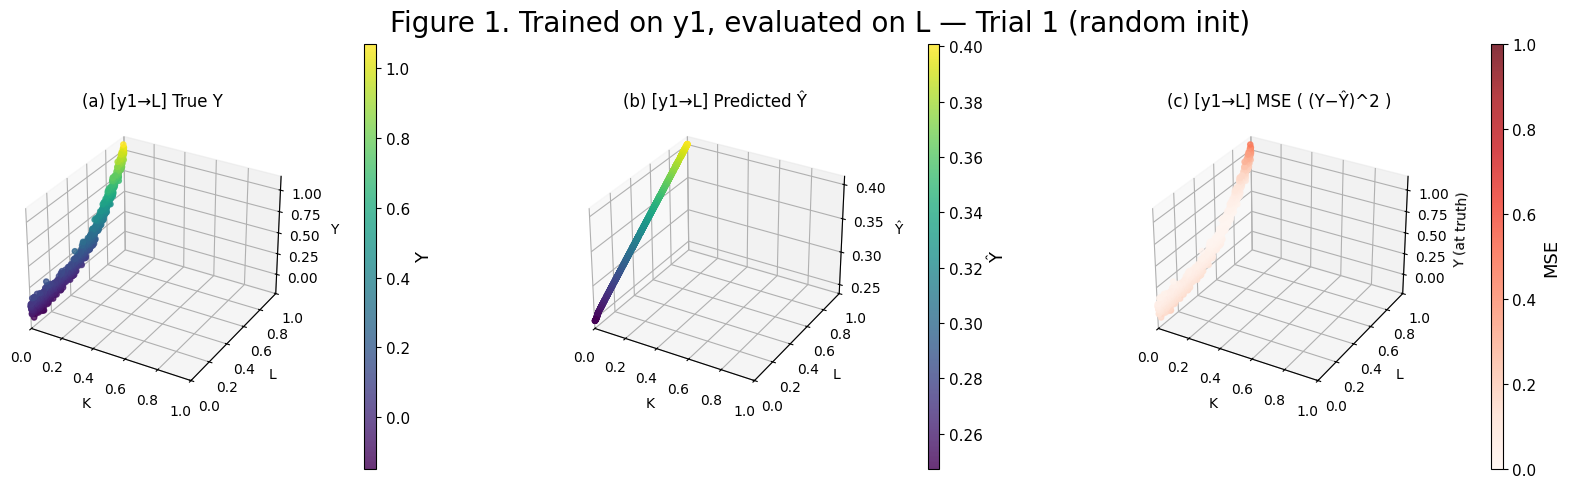

[Trial 2/10] plotting ...


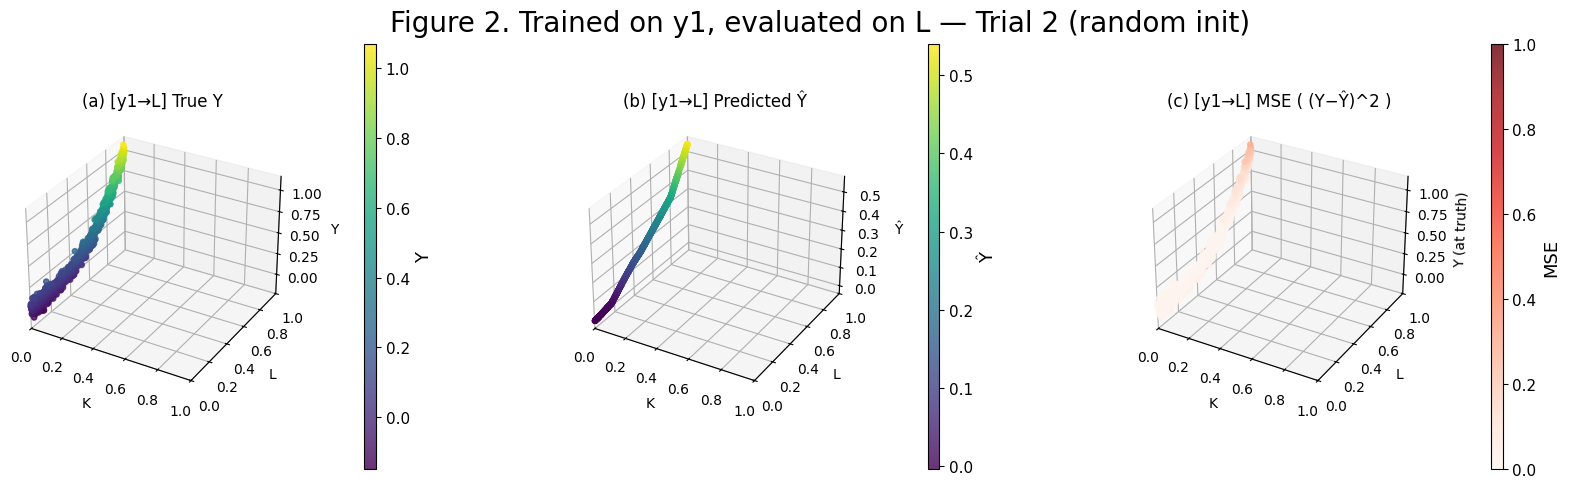

[Trial 3/10] plotting ...


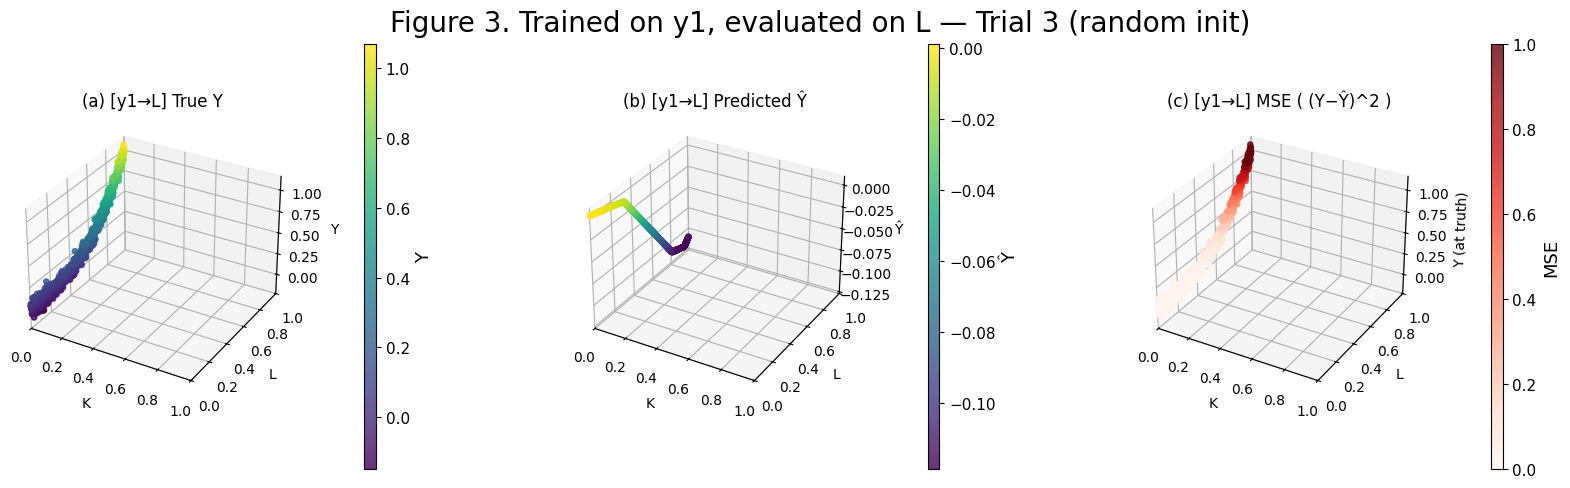

[Trial 4/10] plotting ...


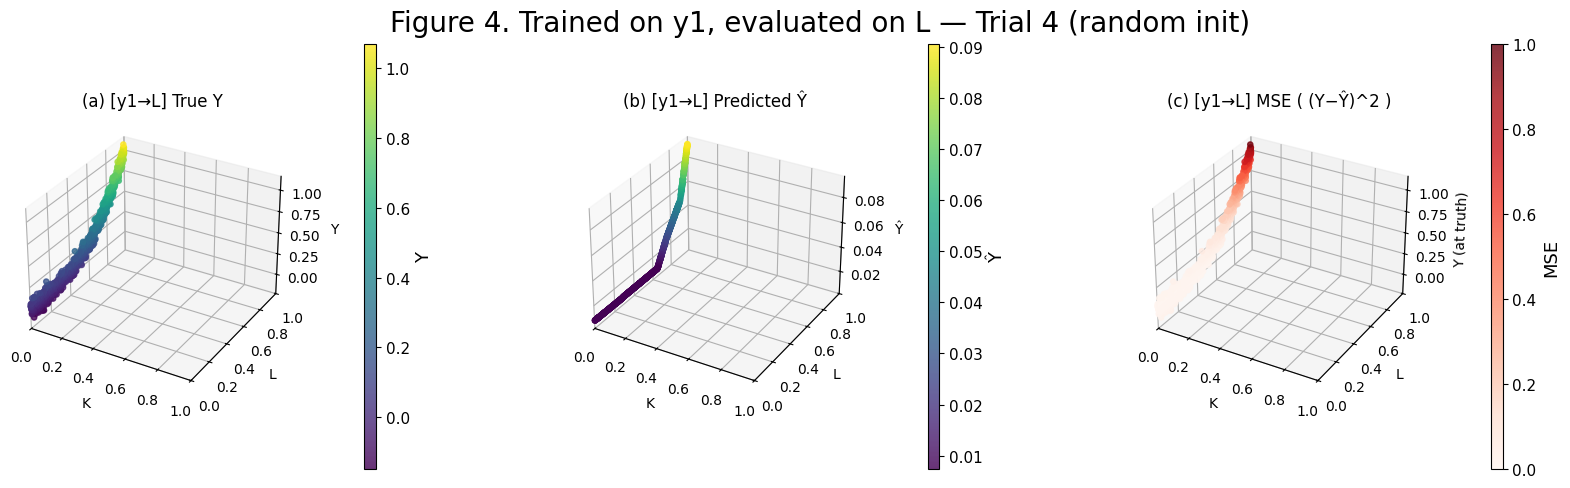

[Trial 5/10] plotting ...


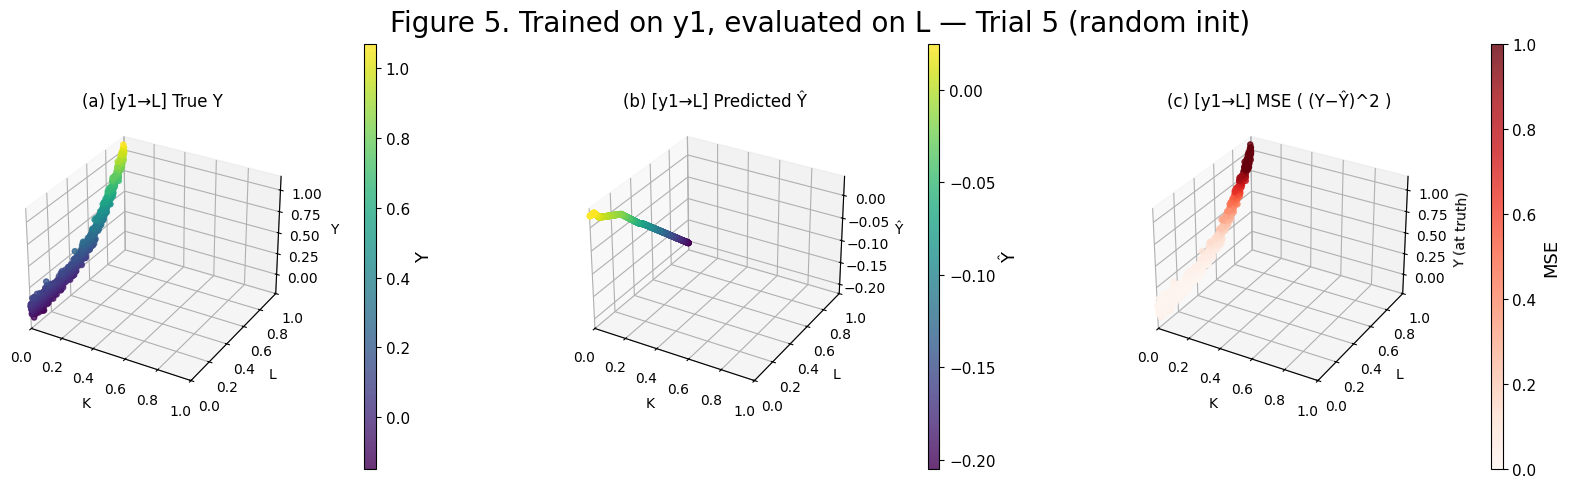

[Trial 6/10] plotting ...


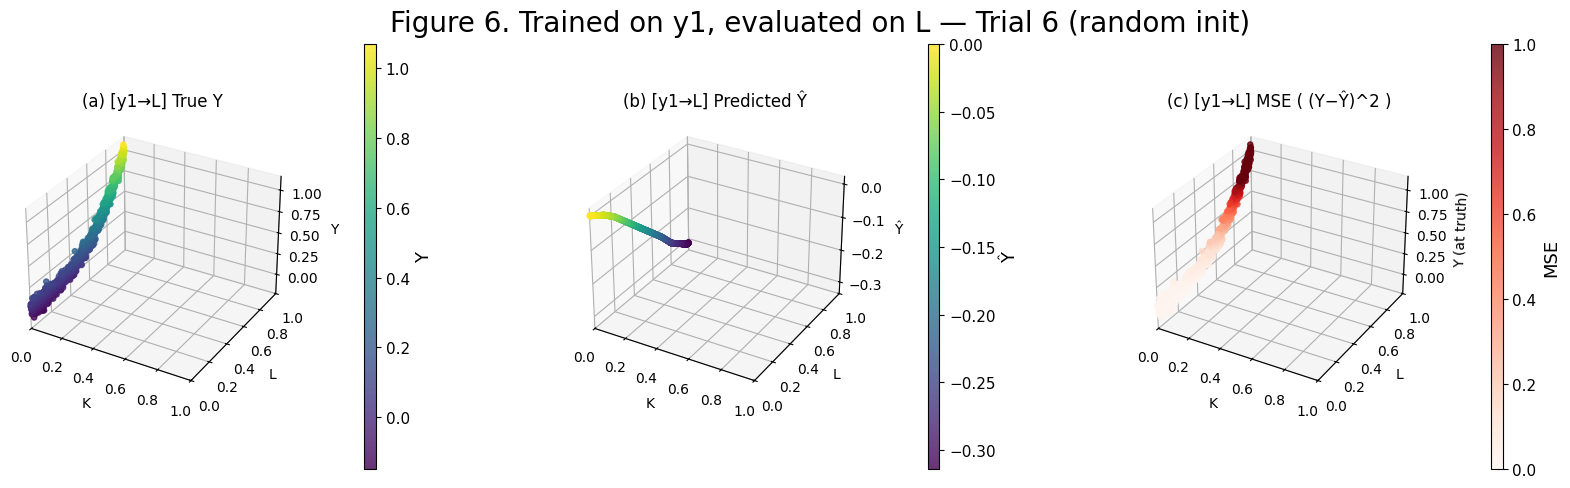

[Trial 7/10] plotting ...


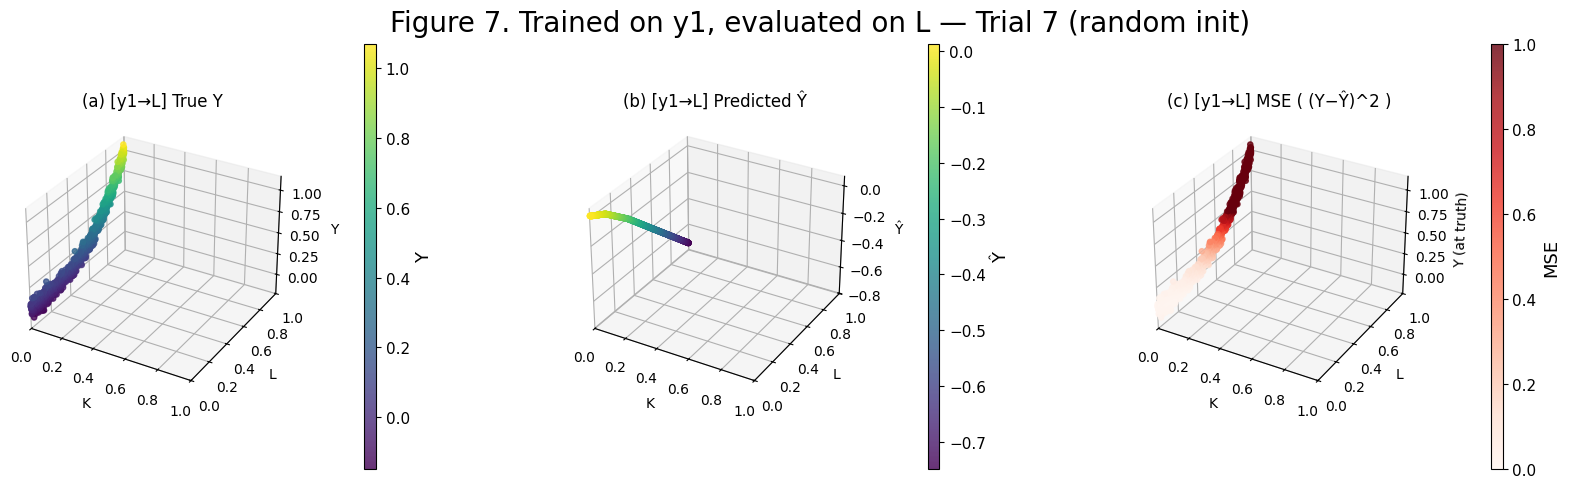

[Trial 8/10] plotting ...


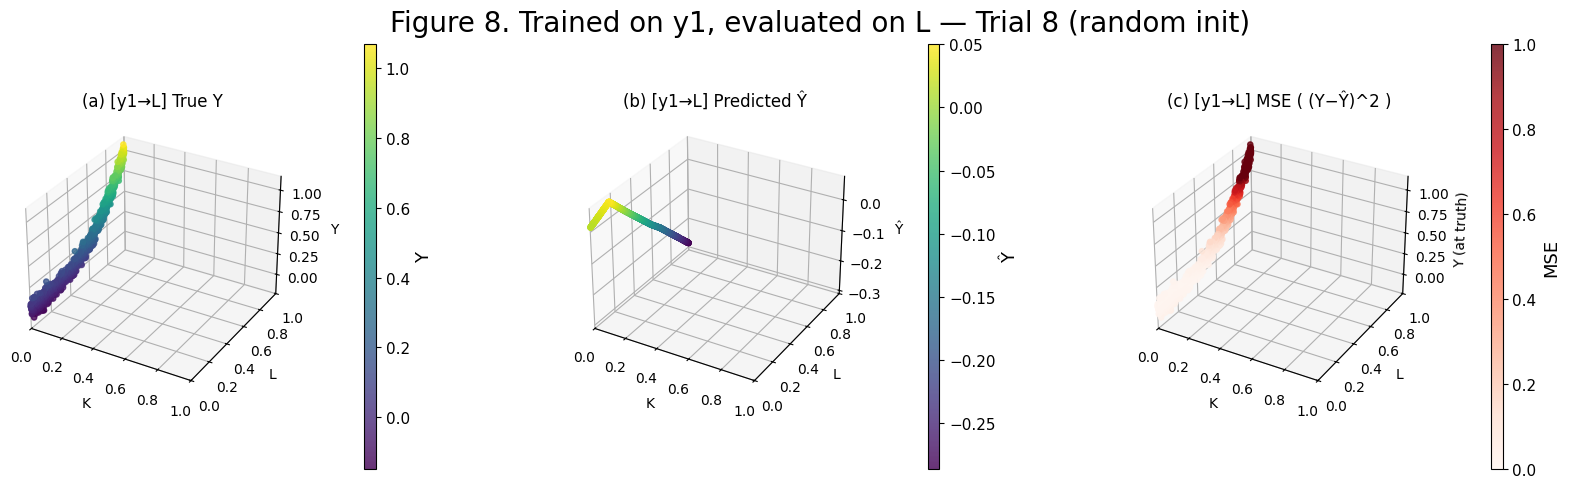

[Trial 9/10] plotting ...


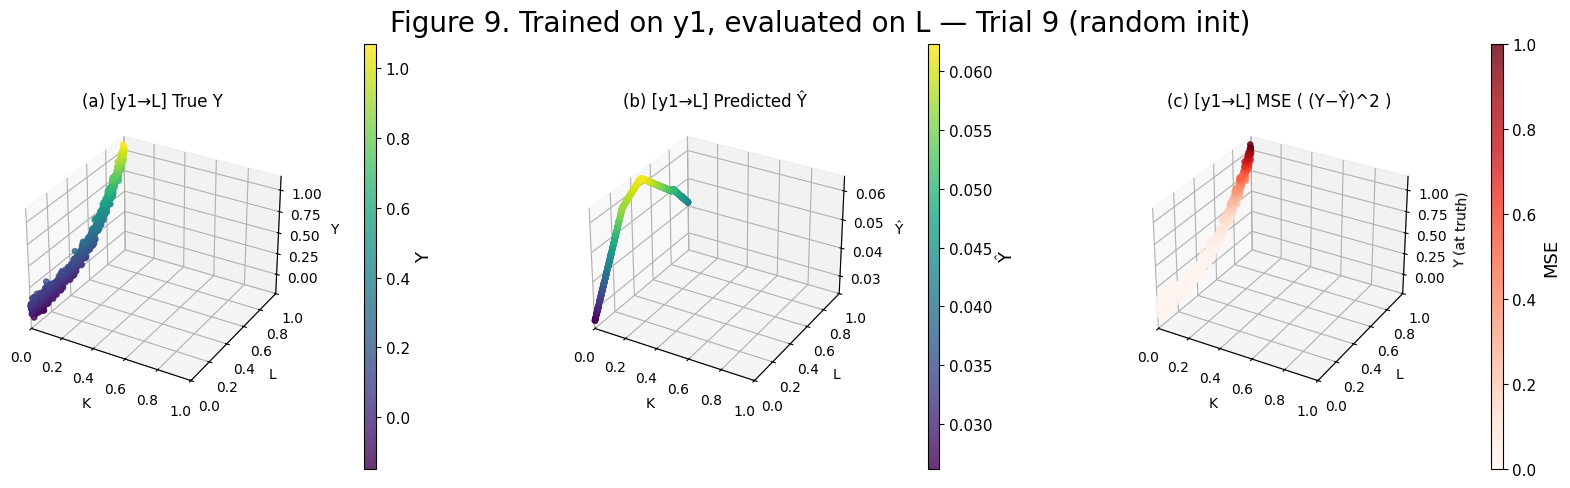

[Trial 10/10] plotting ...


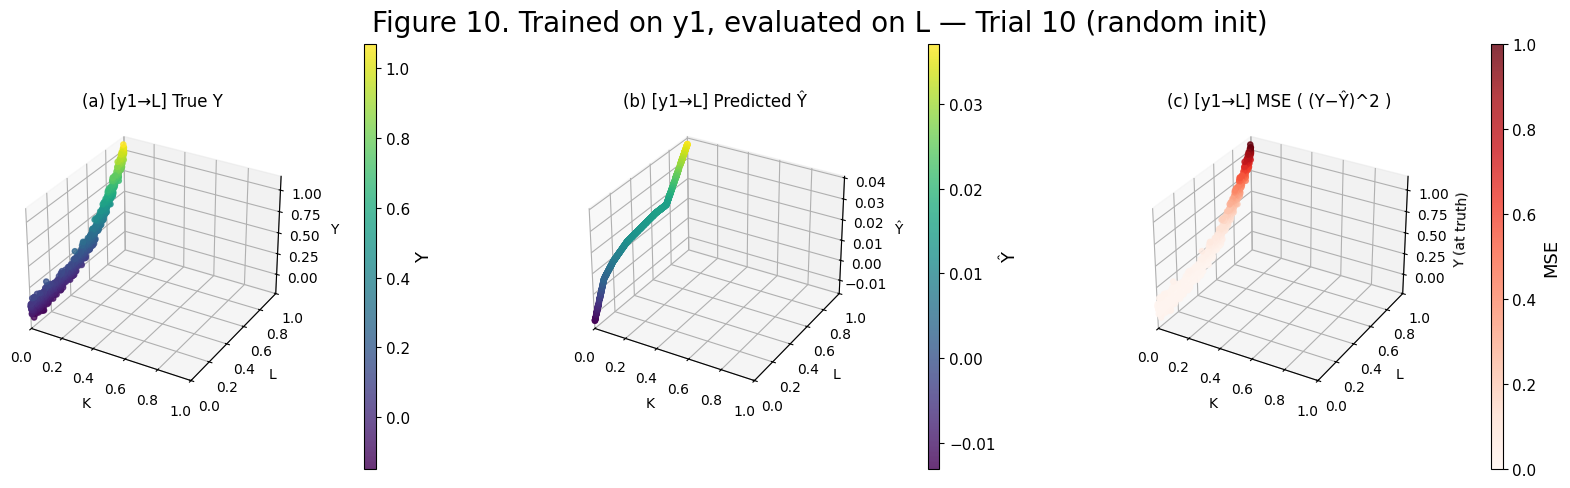

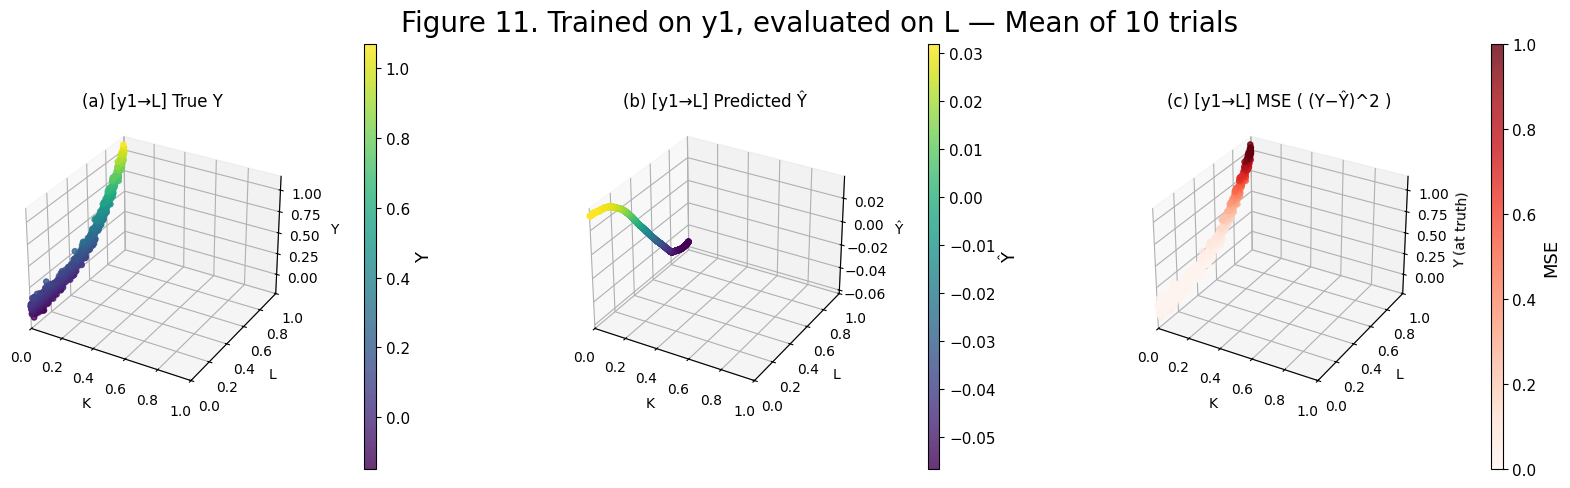

In [ ]:
# 10 trials
for t in range(n_trials):
    print(f"[Trial {t+1}/{n_trials}] plotting ...")
    draw_triptych(
        title_prefix="[y1→L]",
        Kv=K0_1d, Lv=L_1d,
        y_true=L_true_1d, y_pred=L_preds[t],
        vmin=vmin, vmax=vmax,
        fig_no=t+1,
        caption=f"Trained on y1, evaluated on L — Trial {t+1} (random init)"
    )

# Mean of 10 trials
L_pred_mean = L_preds.mean(axis=0)

### Run TL prediction & MSE analysis on y1 -> y2

In [85]:
l4 = model.get_weights()[-4].T
(np.where(l4<0, l4,0) ).sum(axis=1)

array([-2.6793485, -1.310405 , -1.71894  , -0.9578369, -0.9244846,
       -1.3778926, -1.9731925, -1.1675445], dtype=float32)

In [86]:
l4 = model_tf_y2.get_weights()[-4].T
(np.where(l4<0, l4,0) ).sum(axis=1)

array([-2.2434125 , -0.7646681 , -0.66257405, -2.1714678 , -0.84110844,
       -0.6623274 , -0.8841689 , -1.3440596 ], dtype=float32)

In [87]:
l4 = model_tf_y3.get_weights()[-4].T
(np.where(l4<0, l4,0) ).sum(axis=1)

array([-0.6615125 , -0.07244799, -0.4445988 , -2.9325943 , -1.1682243 ,
       -2.041462  , -1.3559136 , -2.1786132 ], dtype=float32)

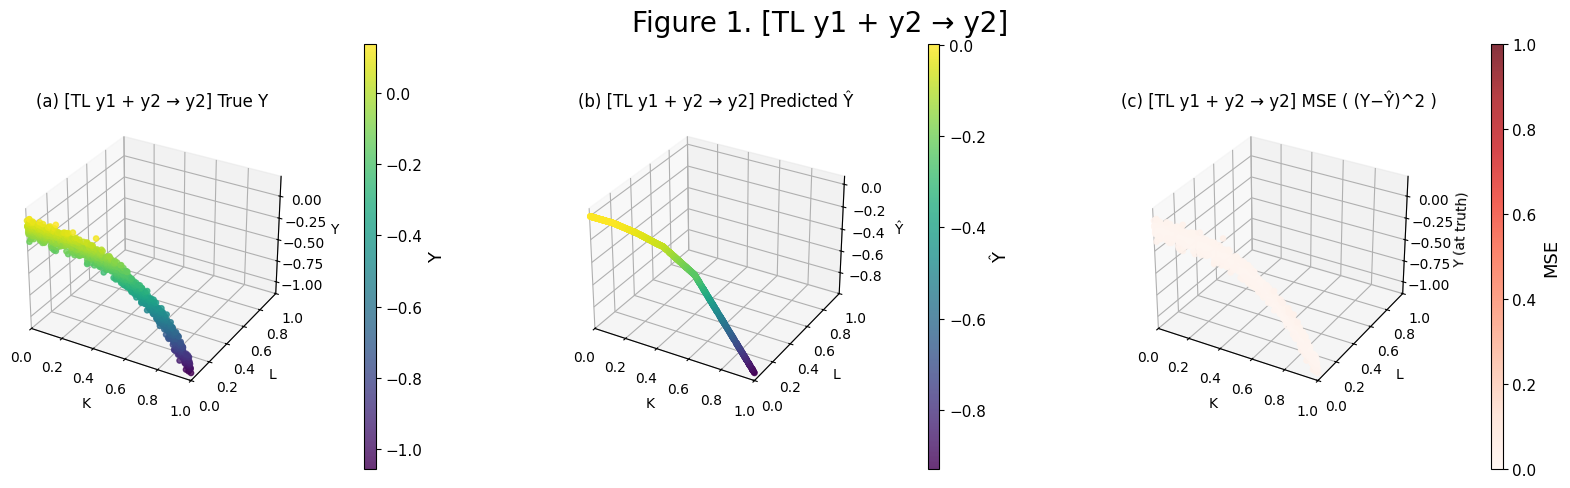

In [10]:
y2_pred_tf = model_tf_y2.predict(X_K, verbose=0)

draw_triptych("[TL y1 + y2 → y2]", K, L0,  y2, y2_pred_tf, vmin=0, vmax=1)

### Run TL prediction & MSE analysis on y1 -> y3

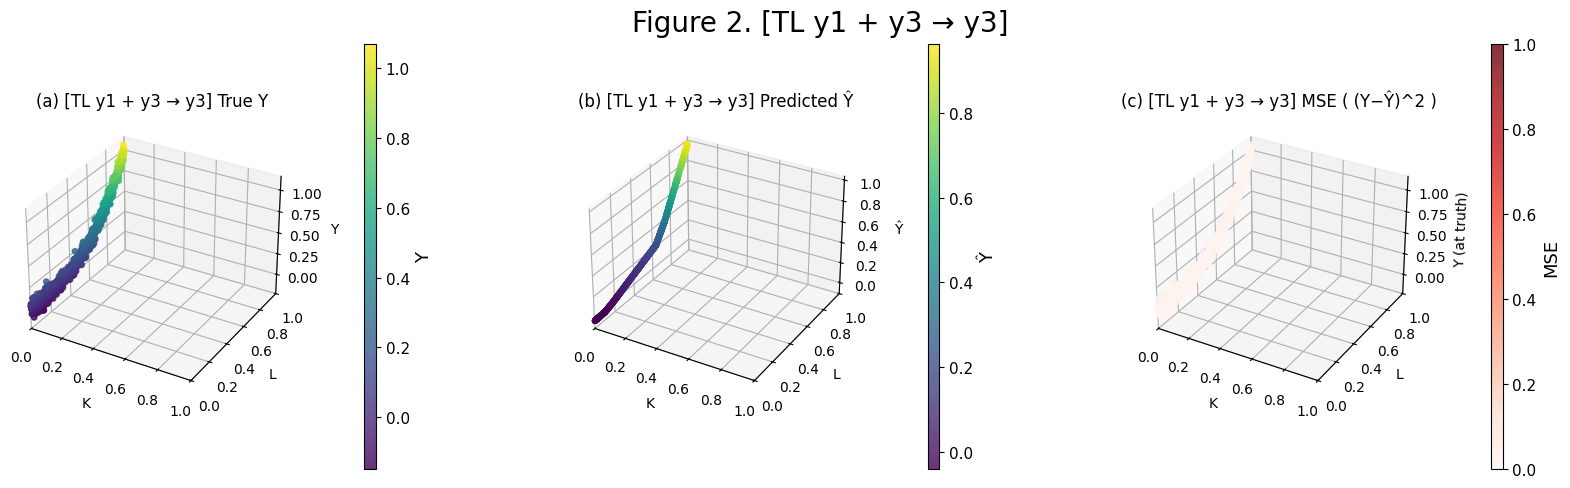

In [11]:
y3_pred_tf = model_tf_y3.predict(X_L, verbose=0)

draw_triptych("[TL y1 + y3 → y3]", K0, L, y3, y3_pred_tf, vmin=0, vmax=1)

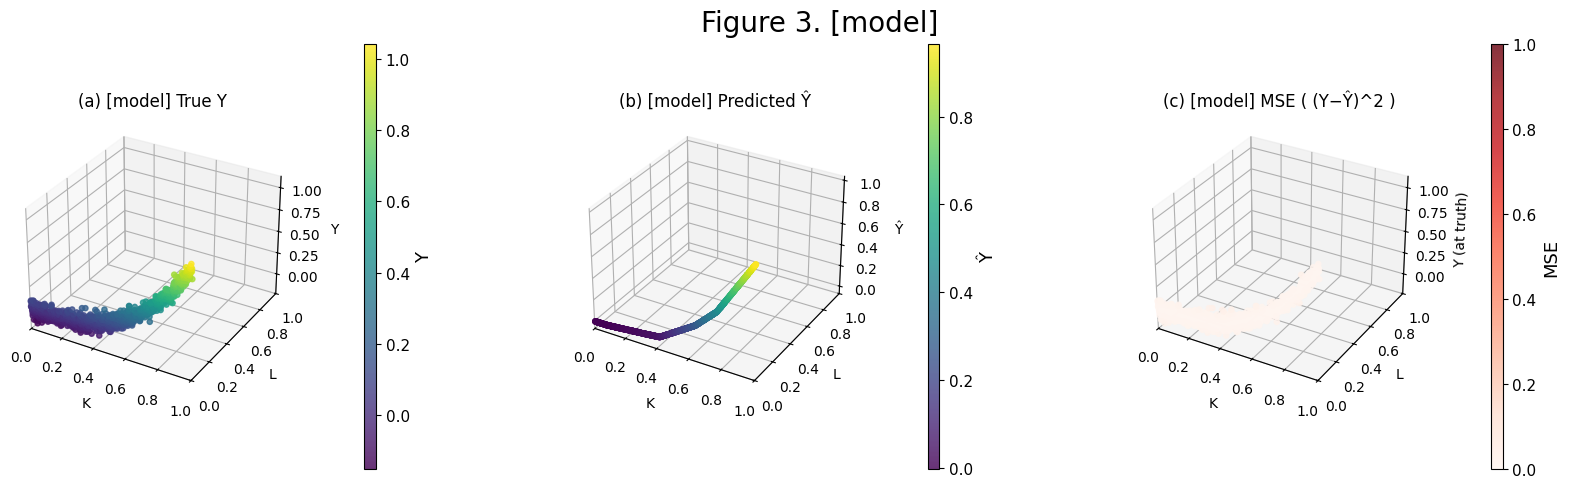

In [12]:
pred = model.predict(X_K, verbose=0)

draw_triptych("[model]", K, L0, y1, pred, vmin=0, vmax=1)

### Model Structure Visualization

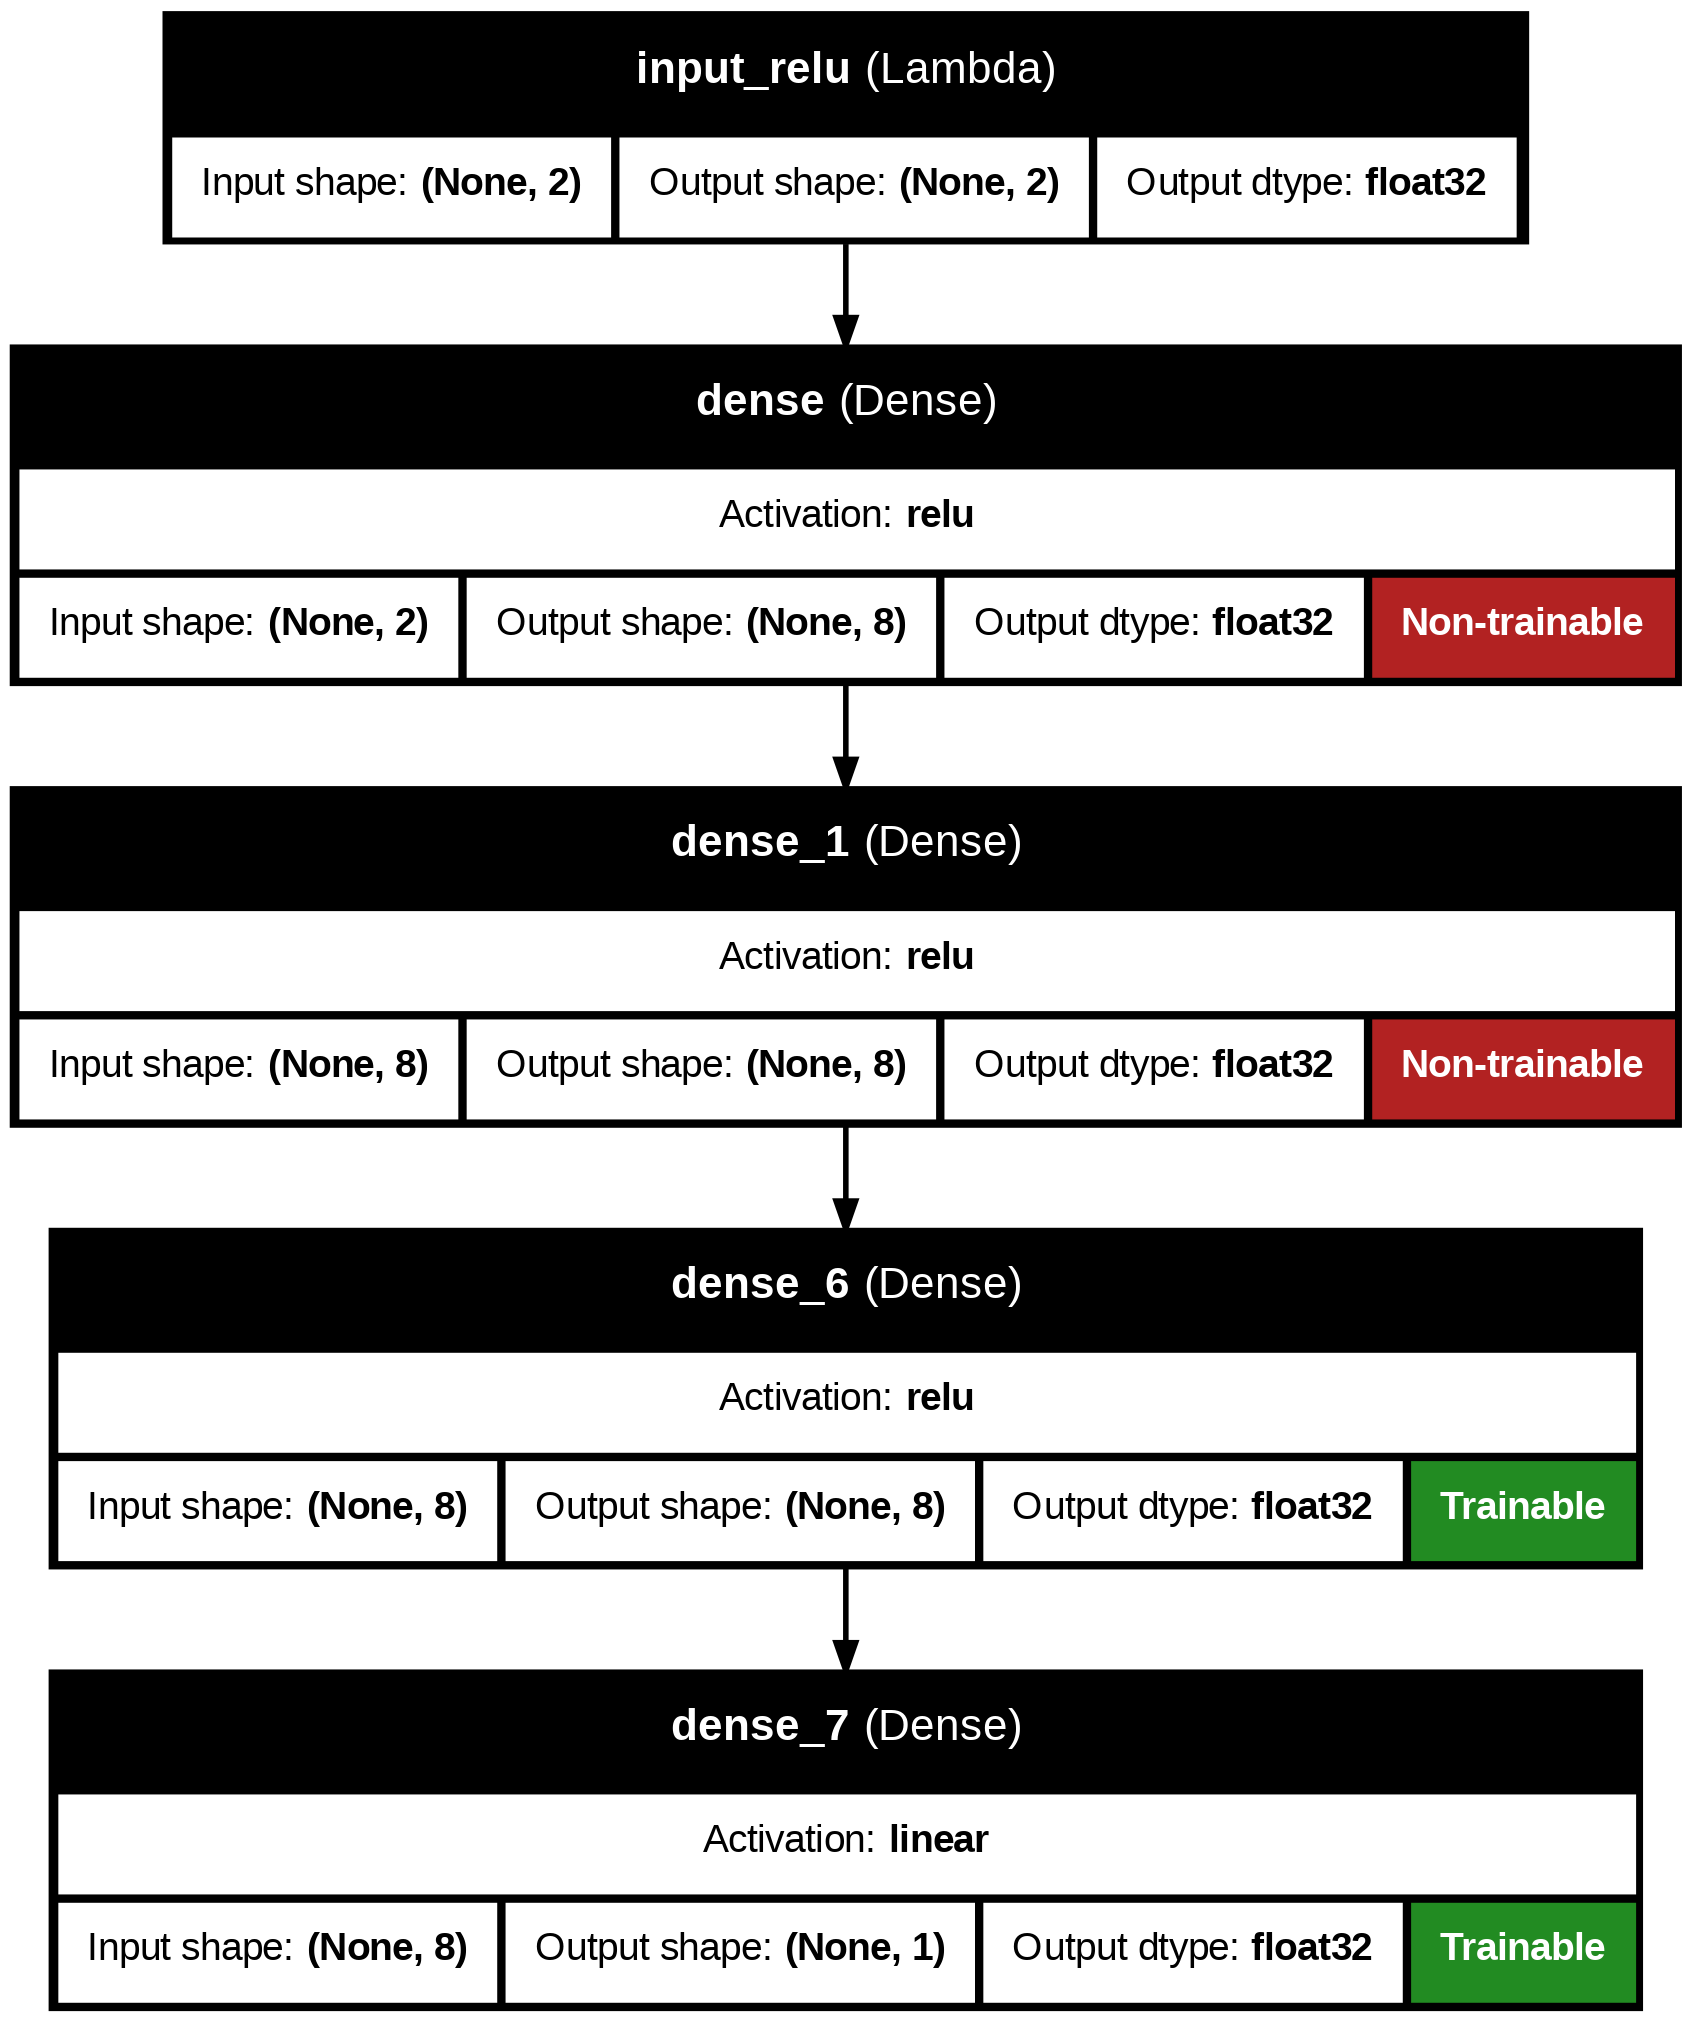

In [13]:
# Original model

tf.keras.utils.plot_model(model, to_file='model_original.png', show_layer_activations=True, show_trainable=True, show_shapes=True, show_dtype=True, show_layer_names=True)

# Transfer learning model 1 (y1 -> y2)

tf.keras.utils.plot_model(model_tf_y2, to_file='model_tf_y2.png', show_layer_activations=True, show_trainable=True, show_shapes=True, show_dtype=True, show_layer_names=True)

# Transfer learning model 1 (y1 -> y3)

tf.keras.utils.plot_model(model_tf_y3, to_file='model_tf_y3.png', show_layer_activations=True, show_trainable=True, show_shapes=True, show_dtype=True, show_layer_names=True)